In [ ]:
Tuning a Decision Tree

In [19]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,:2]
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [20]:
import pandas as pd
pd.DataFrame(X,columns=iris.feature_names[:2])

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()     #Instantiate tree with default parameters
dtc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.68888888888888888

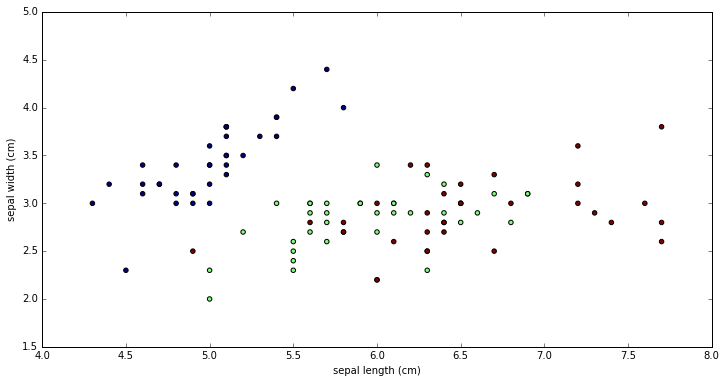

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=((12,6)))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'criterion':['gini','entropy'], 'max_depth' : [3,5,7,20]}

gs_inst = GridSearchCV(dtc,param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [23]:
from sklearn.metrics import accuracy_score

y_pred_gs = gs_inst.predict(X_test)
accuracy_score(y_test, y_pred_gs)

0.71111111111111114

In [24]:
gs_inst.grid_scores_

C:\Users\jdavila\Anaconda27\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.70476, std: 0.07619, params: {'criterion': 'gini', 'max_depth': 3},
 mean: 0.69524, std: 0.08303, params: {'criterion': 'gini', 'max_depth': 5},
 mean: 0.64762, std: 0.09805, params: {'criterion': 'gini', 'max_depth': 7},
 mean: 0.66667, std: 0.08518, params: {'criterion': 'gini', 'max_depth': 20},
 mean: 0.67619, std: 0.08729, params: {'criterion': 'entropy', 'max_depth': 3},
 mean: 0.69524, std: 0.08303, params: {'criterion': 'entropy', 'max_depth': 5},
 mean: 0.65714, std: 0.10605, params: {'criterion': 'entropy', 'max_depth': 7},
 mean: 0.64762, std: 0.08303, params: {'criterion': 'entropy', 'max_depth': 20}]

In [25]:
zip(gs_inst.cv_results_['mean_test_score'],gs_inst.cv_results_['params'])

[(0.70476190476190481, {'criterion': 'gini', 'max_depth': 3}),
 (0.69523809523809521, {'criterion': 'gini', 'max_depth': 5}),
 (0.64761904761904765, {'criterion': 'gini', 'max_depth': 7}),
 (0.66666666666666663, {'criterion': 'gini', 'max_depth': 20}),
 (0.67619047619047623, {'criterion': 'entropy', 'max_depth': 3}),
 (0.69523809523809521, {'criterion': 'entropy', 'max_depth': 5}),
 (0.65714285714285714, {'criterion': 'entropy', 'max_depth': 7}),
 (0.64761904761904765, {'criterion': 'entropy', 'max_depth': 20})]

In [26]:
gs_inst.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

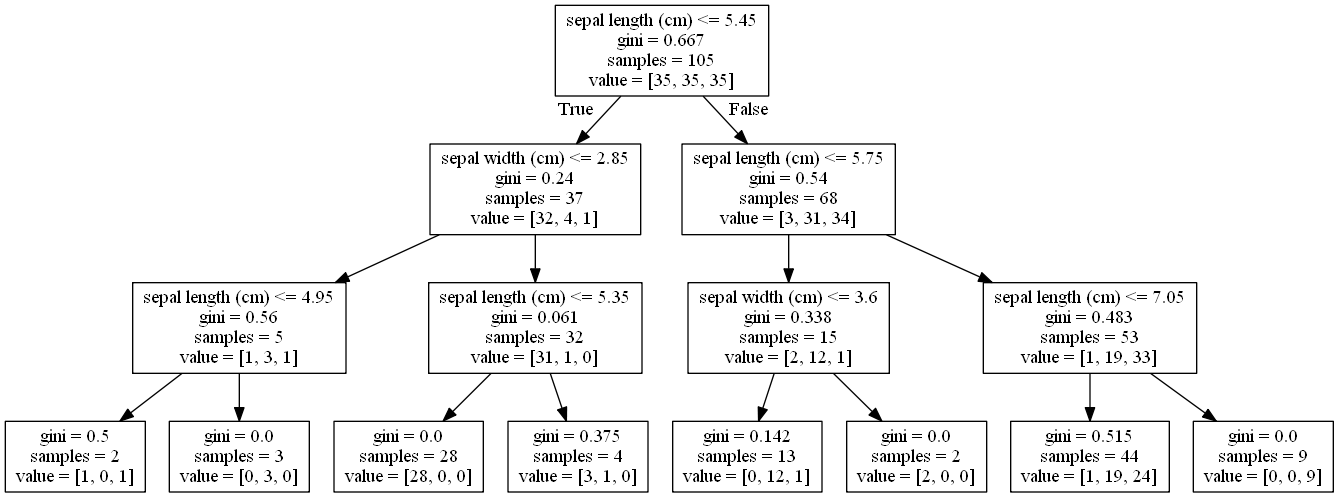

In [27]:
import numpy as np
from sklearn import tree
from sklearn.externals.six import StringIO

import pydot
from IPython.display import Image

dot_iris = StringIO()
tree.export_graphviz(gs_inst.best_estimator_, out_file = dot_iris, feature_names = iris.feature_names[:2])
graph = pydot.graph_from_dot_data(dot_iris.getvalue())

Image(graph.create_png())

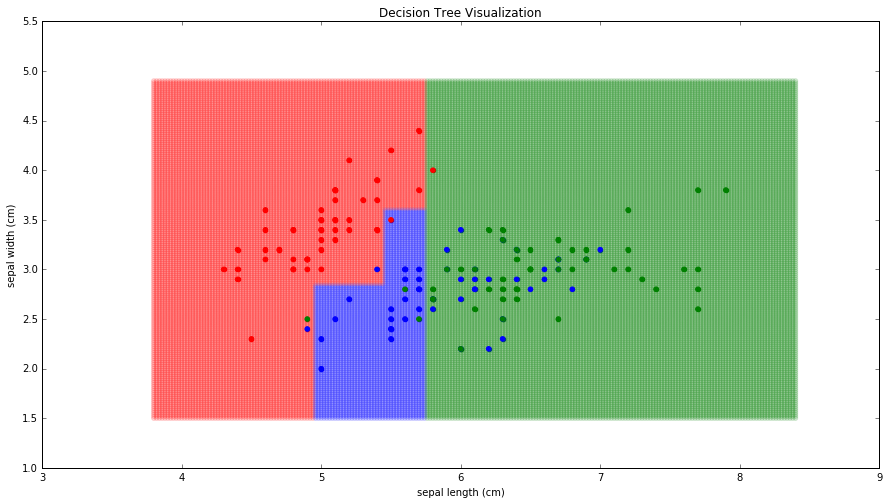

In [28]:
grid_interval = 0.02

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

xmin_plot, xmax_plot = xmin - .5, xmax + .5
ymin_plot, ymax_plot = ymin - .5, ymax + .5

xx, yy = np.meshgrid(np.arange(xmin_plot, xmax_plot, grid_interval),
np.arange(ymin_plot, ymax_plot, grid_interval))

import matplotlib.pyplot as plt
%matplotlib inline

X_0 = X[y == 0]
X_1 = X[y == 1]
X_2 = X[y == 2]

plt.figure(figsize=(15,8)) #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')
plt.scatter(X_2[:,0],X_2[:,1], color = 'green')

test_preds = gs_inst.best_estimator_.predict(np.array(zip(xx.ravel(), yy.ravel())))

colors = np.array(['r', 'b','g'])
plt.scatter(xx.ravel(), yy.ravel(), color=colors[test_preds], alpha=0.15)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])
plt.title("Decision Tree Visualization")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

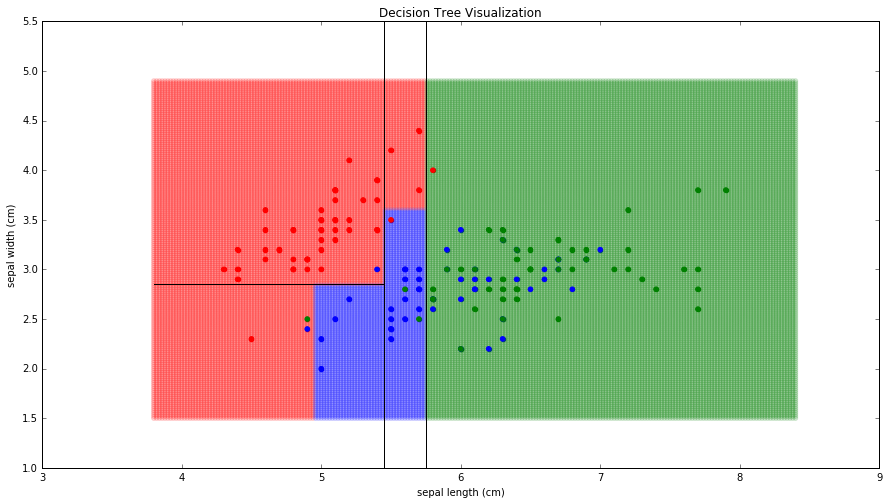

In [32]:
plt.figure(figsize=(15,8)) #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')
plt.scatter(X_2[:,0],X_2[:,1], color = 'green')

test_preds = gs_inst.best_estimator_.predict(np.array(zip(xx.ravel(), yy.ravel())))

colors = np.array(['r', 'b','g'])
plt.scatter(xx.ravel(), yy.ravel(), color=colors[test_preds], alpha=0.15)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])
plt.title("Decision Tree Visualization")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

#The numbers below just changed in this example
plt.axvline(x = 5.45, color='black')
plt.axvline(x = 5.75, color='black')
plt.plot((xmin_plot, 5.45), (2.85, 2.85), color='black')

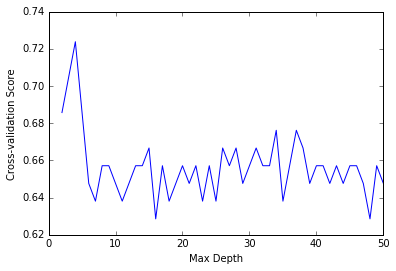

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()


from sklearn.model_selection import GridSearchCV, cross_val_score

max_depths = range(2,51)
param_grid = {'max_depth' : max_depths}

gs_inst = GridSearchCV(dtc, param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)

plt.plot(max_depths,gs_inst.cv_results_['mean_test_score'])
plt.xlabel('Max Depth')
plt.ylabel("Cross-validation Score")